In [1]:
source("../aux/spatnet_aux.R")

Loading required package: maptools
Loading required package: sp
Checking rgeos availability: FALSE
 	Note: when rgeos is not available, polygon geometry 	computations in maptools depend on gpclib,
 	which has a restricted licence. It is disabled by default;
 	to enable gpclib, type gpclibPermit()
Loading required package: spdep
Loading required package: Matrix
Loading required package: spData
To access larger datasets in this package, install the spDataLarge
package with: `install.packages('spDataLarge',
repos='https://nowosad.github.io/drat/', type='source')`
Loading required package: RColorBrewer


In [2]:
data(wrld_simpl)
world <- wrld_simpl
Countries <- c("Argentina", "Bolivia", "Brazil", "Colombia", "Ecuador",
             "Paraguay", "Peru", "Uruguay", "Venezuela")

In [3]:
which.polys <- vector(mode = "list", length(Countries))
for (c in 1:length(Countries)){
  which.polys[[c]] <- grep(paste(Countries[c]), world$NAME)
}
SA <- world[unlist(which.polys), ]

In [4]:
BFsA.raw <- read.csv("../../DATA/BEAST_OUTPUT/Bayes_factors_spatial_A.csv")
BFsO.raw <- read.csv("../../DATA/BEAST_OUTPUT/Bayes_factors_spatial_O.csv")

In [5]:
( BFsA <- BFsA.raw[BFsA.raw$BF >= 3, ] ) 
( BFsO <- BFsO.raw[BFsO.raw$BF >= 3, ] )

FROM,TO,prob,BF
Argentina,Uruguay,0.9999907,2.850824e+05
Brazil,Venezuela,0.9996759,8.142647e+03
Argentina,Brazil,0.9996111,6.785099e+03
Venezuela,Colombia,1.0000000,1.000000e+03
Peru,Venezuela,0.9249280,3.252135e+01
Ecuador,Peru,0.8472172,1.463723e+01
Bolivia,Brazil,0.8291159,1.280714e+01
Venezuela,Ecuador,0.8170977,1.179216e+01
Peru,Bolivia,0.6282418,4.460719e+00
Argentina,Peru,0.6080757,4.095378e+00


FROM,TO,prob,BF
Colombia,Ecuador,0.9997870,14747.218131
Ecuador,Peru,0.9926113,421.994477
Venezuela,Colombia,0.9699175,101.278094
Argentina,Uruguay,0.9138728,33.330347
Argentina,Paraguay,0.8884475,25.017694
Venezuela,Ecuador,0.8312084,15.468695
Brazil,Bolivia,0.8273474,15.052525
Brazil,Argentina,0.7508680,9.467357
Argentina,Brazil,0.5798543,4.335244
Brazil,Venezuela,0.5152079,3.338271


In [6]:
k <- length(Countries)
MA <- MO <- matrix(rep(0, k^2), ncol = k)
colnames(MA) <- rownames(MA) <- colnames(MO) <- rownames(MO) <- Countries

for(p in 1:nrow(BFsA)){ # creating a binary (incidence) matrix
  iA <- match(as.character(BFsA$FROM[p]), Countries)
  jA <- match(as.character(BFsA$TO[p]), Countries)
    MA[iA, jA] <- 1  
}

for(q in 1:nrow(BFsO)){
  iO <- match(as.character(BFsO$FROM[q]), Countries)
  jO <- match(as.character(BFsO$TO[q]), Countries)
    MO[iO, jO] <- 1  
}

In [7]:
MA; MO

,Argentina,Bolivia,Brazil,Colombia,Ecuador,Paraguay,Peru,Uruguay,Venezuela
Argentina,0,0,1,0,0,0,1,1,0
Bolivia,0,0,1,0,0,0,0,0,0
Brazil,0,0,0,0,0,0,0,0,1
Colombia,0,0,0,0,0,0,0,0,0
Ecuador,0,0,0,0,0,0,1,0,0
Paraguay,0,0,0,0,0,0,0,0,0
Peru,0,1,0,0,0,0,0,0,1
Uruguay,0,0,0,0,0,0,0,0,0
Venezuela,0,0,0,1,1,0,0,0,0


,Argentina,Bolivia,Brazil,Colombia,Ecuador,Paraguay,Peru,Uruguay,Venezuela
Argentina,0,0,1,0,0,1,0,1,0
Bolivia,0,0,0,0,0,0,0,0,0
Brazil,1,1,0,0,0,0,0,0,1
Colombia,0,0,0,0,1,0,0,0,0
Ecuador,0,0,0,0,0,0,1,0,0
Paraguay,0,0,0,0,0,0,0,0,0
Peru,0,0,0,0,0,0,0,0,0
Uruguay,0,0,0,0,0,0,0,0,0
Venezuela,0,0,0,1,1,0,0,0,0


In [8]:
FTA <- read.csv("../../DATA/BEAST_OUTPUT/MJ_results_A.csv")
FTO <- read.csv("../../DATA/BEAST_OUTPUT/MJ_results_O.csv")

In [9]:
FTA; FTO

COUNTRY,FROM,TO
Argentina,1.126,14.050
Bolivia,8.389,6.243
Brazil,1.168,1.281
Colombia,5.154,1.883
Ecuador,2.378,1.178
Paraguay,0.000,0.000
Peru,1.987,1.987
Uruguay,4.169,0.740
Venezuela,7.127,5.354


COUNTRY,FROM,TO
Argentina,3.047,9.456
Bolivia,3.632,5.523
Brazil,3.957,1.521
Colombia,3.746,5.681
Ecuador,5.388,1.634
Paraguay,2.906,1.183
Peru,2.149,0.221
Uruguay,1.189,0.264
Venezuela,2.259,2.791


In [10]:
fnbA <- mat2listw(MA, style = "B") # neighbourhood from the BF data
fnbO <- mat2listw(MO, style = "B") 

Warning message in nb2listw(res$neighbours, glist = res$weights, style = style, :
“zero sum general weights”Warning message in nb2listw(res$neighbours, glist = res$weights, style = style, :
“zero sum general weights”

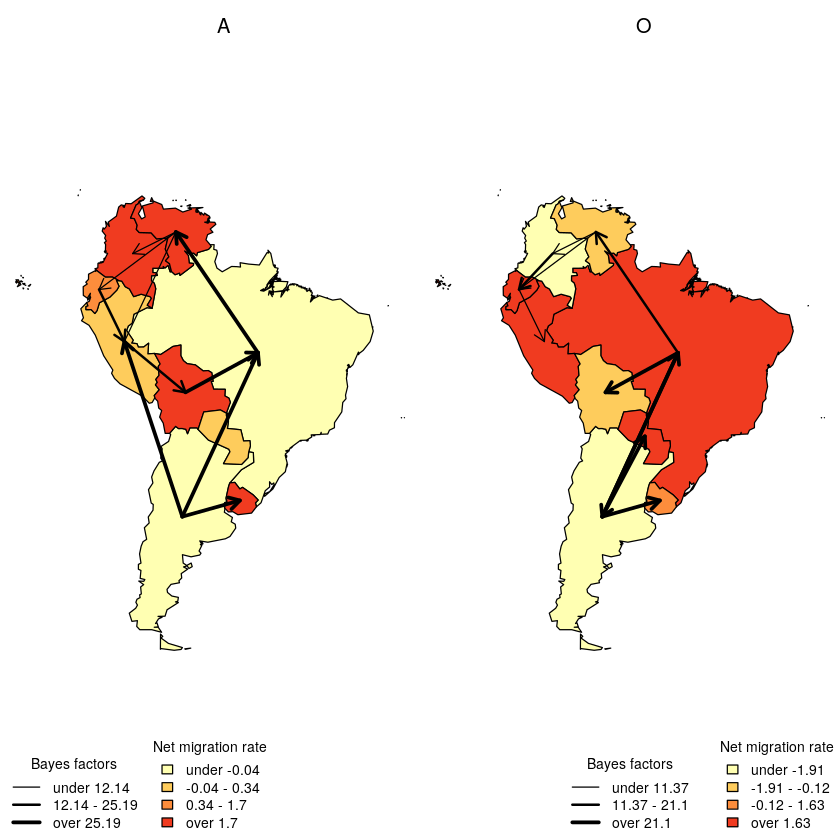

In [15]:
export <- FALSE
if(export) pdf("../../FIGURES/PLOTS/MJandBFs.pdf")
par(mfrow = c(1, 2))
par(mai = c(0, 0, 0, 0))
plot.spatnett(SA, ws = BFsA$BF, nb = fnbA$neighbours, nets = FTA$FROM-FTA$TO, nbrk = 4,
              coropleth = TRUE, thck = TRUE, title = "Net migration rate")
legend( x = "top", legend = "A", cex = 1, bty = "n")
par(mai = c(0, 0, 0, 0))
plot.spatnettinv(SA, ws = BFsO$BF, nb = fnbO$neighbours, nets = FTO$FROM-FTO$TO, nbrk = 4, # don't even bother asking why a different plotting function...
              coropleth = TRUE, thck = TRUE, title = "Net migration rate")
legend( x = "top", legend = "O", cex = 1, bty = "n")
if(export) dev.off()    